# Problem Set 5: Recognized and classify the digital handwriting with CNN
Yi Ming Chang <br>
B00751897<br>
April 23th, 2021

I have tried to run several the bird species classification codes using PyTorch with CNN model, but none of them works. So I decide to play with the digital handwriting classification codes with CNN model. The following code is retrieved from this website: https://www.kaggle.com/cdeotte/25-million-images-0-99757-mnist and https://www.kaggle.com/arunkumarramanan/awesome-deep-learning-with-cnn-mnist-classifier. Since, having one code seems like this too short. I have also found something interesting, handwriting math equations, handwriting chinese characters, for example. But they are only for a case.

In this Problem set, it contains two different sections. One is from https://www.kaggle.com/cdeotte/25-million-images-0-99757-mnist, other is from https://www.kaggle.com/arunkumarramanan/awesome-deep-learning-with-cnn-mnist-classifier. Since there is no question or rubric for this problem. I will simply explain what I have learned and changed (debugged) from the codes. Also varying the parameters or the loss function inside the code to see if I could improve them.

# Section 1 

This section uses an ensembles of 15 CNNs to classify Kaggle's MNIST digits. There are 42,000 images in training dataset. In addition, another 25 million images will be created by rotating, scaling, and shifting training dataset. So 25,042,000 images in total. 

In [23]:
# LOAD LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

# Load Kaggle's 42,000 training images

In [24]:
# LOAD THE DATA
folder = 'C://Users//Yi Ming Chang//Desktop//Dal//PHYC 4250 Topics in Numerical Computing//Problem Sets//Problem set 5//'
train = pd.read_csv(folder + 'train.csv')
test = pd.read_csv(folder + 'test.csv')

In [45]:
# PREPARE DATA FOR NEURAL NETWORK
# Load training and eval data

Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)
X_train = X_train / 255.0
X_test = test / 255.0
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)

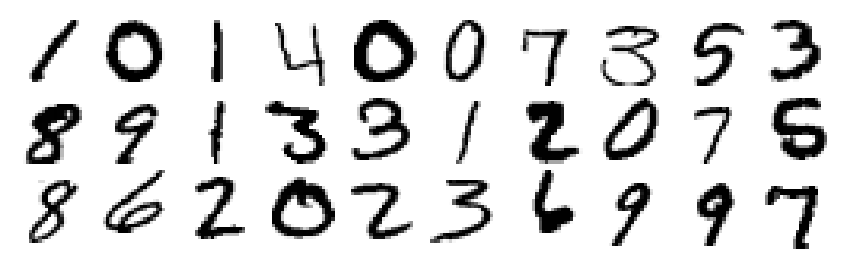

In [46]:
import matplotlib.pyplot as plt
# PREVIEW IMAGES
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

# Generate 25 million more images
by randomly rotating, scaling, and shifting Kaggle's 42,000 images.

In [42]:
# CREATE MORE IMAGES VIA DATA AUGMENTATION
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [43]:
# PREVIEW AUGMENTED IMAGES
X_train3 = X_train[9,].reshape((1,28,28,1))
Y_train3 = Y_train[9,].reshape((1,10))
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    X_train2, Y_train2 = datagen.flow(X_train3,Y_train3).next()
    plt.imshow(X_train2[0].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
    if i==9: X_train3 = X_train[11,].reshape((1,28,28,1))
    if i==19: X_train3 = X_train[18,].reshape((1,28,28,1))
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

ValueError: cannot reshape array of size 1 into shape (1,10)

# Build 15 Convolutional Neural Networks!

There are 15 CNNs in total. Each Network includes 9 layers with 426 Neurons. They also use Dropout and Batch Normalization techniques. 

In [44]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 15
model = [0] *nets
for j in range(nets):
    model[j] = Sequential()

    model[j].add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(128, kernel_size = 4, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Flatten())
    model[j].add(Dropout(0.4))
    model[j].add(Dense(10, activation='softmax'))

    # COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Architectural highlights
![LeNet5](http://playagricola.com/Kaggle/LeNet5.png)
The CNNs in this kernel follow [LeNet5's][1] design (pictured above) with the following improvements:  
* Two stacked 3x3 filters replace the single 5x5 filters. These become nonlinear 5x5 convolutions
* A convolution with stride 2 replaces pooling layers. These become learnable pooling layers.
* ReLU activation replaces sigmoid.
* Batch normalization is added
* Dropout is added
* More feature maps (channels) are added
* An ensemble of 15 CNNs with bagging is used  
  
Experiments [(here)][2] show that each of these changes improve classification accuracy.

[1]:http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf
[2]:https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist

# Train 15 CNNs

In [34]:
# DECREASE LEARNING RATE EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
# TRAIN NETWORKS
history = [0] * nets
epochs = 1
for j in range(nets):
    X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.1)
    history[j] = model[j].fit_generator(datagen.flow(X_train2,Y_train2, batch_size=64),
        epochs = epochs, steps_per_epoch = X_train2.shape[0]//64,  
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        j+1,epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 1: Epochs=1, Train accuracy=0.84638, Validation accuracy=0.97167
CNN 2: Epochs=1, Train accuracy=0.85330, Validation accuracy=0.88452
CNN 3: Epochs=1, Train accuracy=0.84124, Validation accuracy=0.97024
CNN 4: Epochs=1, Train accuracy=0.85698, Validation accuracy=0.95071
CNN 5: Epochs=1, Train accuracy=0.85420, Validation accuracy=0.97548
CNN 6: Epochs=1, Train accuracy=0.85942, Validation accuracy=0.96738
CNN 7: Epochs=1, Train accuracy=0.86130, Validation accuracy=0.98024
CNN 8: Epochs=1, Train accuracy=0.86294, Validation accuracy=0.95738
CNN 9: Epochs=1, Train accuracy=0.85285, Validation accuracy=0.90833
CNN 10: Epochs=1, Train accuracy=0.84733, Validation accuracy=0.96667
CNN 11: Epochs=1, Train accuracy=0.85346, Validation accuracy=0.96262
CNN 12: Epochs=1, Train accuracy=0.85385, Validation accuracy=0.97429
CNN 13: Epochs=1, Train accuracy=0.86559, Validation accuracy=0.96738
CNN 14: Epochs=1, Train accuracy=0.85905, Validation accuracy=0.96643
CNN 15: Epochs=1, Train accur

# Ensemble 15 CNN predictions and submit

In [35]:
# ENSEMBLE PREDICTIONS AND SUBMIT
results = np.zeros( (X_test.shape[0],10) ) 
for j in range(nets):
    results = results + model[j].predict(X_test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("MNIST-CNN-ENSEMBLE.csv",index=False)

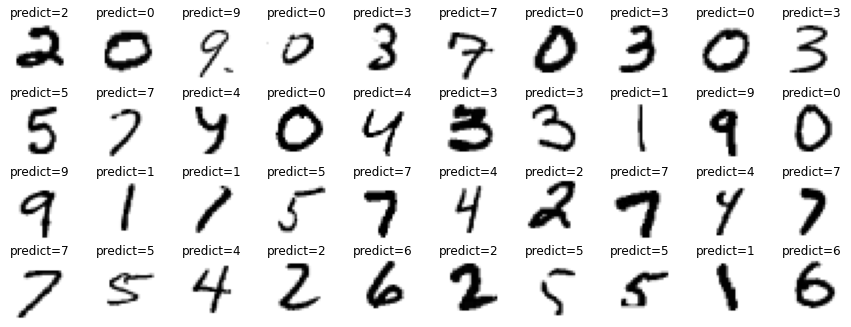

In [36]:
# PREVIEW PREDICTIONS
plt.figure(figsize=(15,6))
for i in range(40):  
    plt.subplot(4, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title("predict=%d" % results[i],y=0.9)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()

Although the accuracy in original code has 99.75%. I have only obtained 98.0% (the highest). Since originally they have 15 epochs, but it takes forever to run, so I reduce it into 1 in order to save time. I have switched the activation function, but still 'relu' works the best. Also, most acticles indicate choosing 'Relu' as activation function for Convolutional Neural Net. According to the website, their publication has highest accuarcy compare with other methods (99.7%-99.79%). Where is shown in the images below.


![hist](http://playagricola.com/Kaggle/KaggleMNISThist3.png)

[1]:https://cs.nyu.edu/~wanli/dropc/dropc.pdf
[2]:http://people.idsia.ch/~ciresan/data/cvpr2012.pdf
[3]:https://arxiv.org/abs/1505.03229
[4]:https://arxiv.org/abs/1511.02583
[5]:https://arxiv.org/abs/1509.08985
[7]:http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html
[8]:http://yann.lecun.com/exdb/mnist/
[9]:https://en.wikipedia.org/wiki/MNIST_database
[10]:https://www.kaggle.com/cdeotte/mnist-perfect-100-using-knn/
[12]:https://www.kaggle.com/cdeotte/35-million-images-0-99757-mnist
[13]:http://people.idsia.ch/~ciresan/data/icdar2011a.pdf
[14]:http://www.mva-org.jp/Proceedings/2015USB/papers/14-21.pdf

# Section 2:

This section built a CNN model using using TensorFlow Estimators. In order to make it run, I add 'tf.compat.v1' to all tf... They use The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) comprises 60,000 training examples and 10,000 test examples of the handwritten digits 0–9, formatted as 28x28-pixel monochrome images. 

In [37]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import numpy as np

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.INFO)

## Building the CNN MNIST Classifier


1.  **Convolutional Layer #1**: Applies 32 5x5 filters (extracting 5x5-pixel subregions), with ReLU activation function
2.  **Pooling Layer #1**: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
3.  **Convolutional Layer #2**: Applies 64 5x5 filters, with ReLU activation function
4.  **Pooling Layer #2**: Again, performs max pooling with a 2x2 filter and stride of 2
5.  **Dense Layer #1**: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
6.  **Dense Layer #2 (Logits Layer)**: 10 neurons, one for each digit target class (0–9).

The CNNs apply a series of filters to the raw pixel data of an image to extract and learn higher-level features. The `tf.compat.v1.layers` module contains methods to create each of the three layer types
above:

*   `conv2d()`. Constructs a two-dimensional convolutional layer. 
*   `max_pooling2d()`. Constructs a two-dimensional pooling layer using the max-pooling algorithm. 
*   `dense()`. Constructs a dense layer. 

Each of these methods accepts a tensor as input and returns a transformed tensor as output. This function takes MNIST feature data, labels, and mode (from `tf.estimator.ModeKeys`: `TRAIN`, `EVAL`, `PREDICT`) as arguments; configures the CNN; and returns predictions, loss, and a training operation:

In [38]:
def cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  conv1 = tf.compat.v1.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  pool1 = tf.compat.v1.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2 and Pooling Layer #2
  conv2 = tf.compat.v1.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)
  pool2 = tf.compat.v1.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Dense Layer
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
  dense = tf.compat.v1.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
  dropout = tf.compat.v1.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits Layer
  logits = tf.compat.v1.layers.dense(inputs=dropout, units=10)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }

  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.compat.v1.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.compat.v1.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.compat.v1.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])
  }
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

### Load Training and Test Data

First, let's load our training and test data with the following code:

In [14]:
# Load training and eval data
((train_data, train_labels), (eval_data, eval_labels)) = tf.keras.datasets.mnist.load_data()

train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)  # not required

eval_data = eval_data/np.float32(255)
eval_labels = eval_labels.astype(np.int32)  # not required

We store the training feature data (the raw pixel values for 55,000 images of
hand-drawn digits) and training labels (the corresponding value from 0–9 for
each image) as [numpy
arrays](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)
in `train_data` and `train_labels`, respectively. Similarly, we store the
evaluation feature data (10,000 images) and evaluation labels in `eval_data`
and `eval_labels`, respectively

### Create the Estimator

Next, let's create an `Estimator` (a TensorFlow class for performing high-level
model training, evaluation, and inference) for our model. Add the following code
to `main()`:

In [39]:
# Create the Estimator
mnist_classifier = tf.estimator.Estimator(
    model_fn=cnn_model_fn, model_dir="/tmp/mnist_convnet_model")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/mnist_convnet_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Set Up a Logging Hook

Since CNNs can take a while to train, let's set up some logging so we can track progress during training. We can use TensorFlow's `tf.compat.v1.train.SessionRunHook` to create a `tf.compat.v1.train.LoggingTensorHook` that will log the probability values from the softmax layer of our CNN. Add the following to `main()`:

In [16]:
# Set up logging for predictions
tensors_to_log = {"probabilities": "softmax_tensor"}

logging_hook = tf.compat.v1.train.LoggingTensorHook(
    tensors=tensors_to_log, every_n_iter=50)

In [17]:
# Train the model
train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"x": train_data},
    y=train_labels,
    batch_size=100,
    num_epochs=None,
    shuffle=True)

# train one step and display the probabilties
mnist_classifier.train(
    input_fn=train_input_fn,
    steps=1,
    hooks=[logging_hook])


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Use keras.layers.dropout instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/mnist_convnet_model\model.ckpt-2002
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflo

INFO:tensorflow:loss = 0.975897, step = 2002
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2003...
INFO:tensorflow:Saving checkpoints for 2003 into /tmp/mnist_convnet_model\model.ckpt.
Instructions for updating:
Use standard file APIs to delete files with this prefix.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 2003...
INFO:tensorflow:Loss for final step: 0.975897.


Now—without logging each step—set `steps=1000` to train the model longer, but in a reasonable time to run this example. Training CNNs is computationally intensive. To increase the accuracy of your model, increase the number of `steps` passed to `train()`, like 20,000 steps. 

In [19]:
mnist_classifier.train(input_fn=train_input_fn, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/mnist_convnet_model\model.ckpt-2003
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2003...
INFO:tensorflow:Saving checkpoints for 2003 into /tmp/mnist_convnet_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 2003...
INFO:tensorflow:loss = 0.90388036, step = 2003
INFO:tensorflow:global_step/sec: 9.96366
INFO:tensorflow:loss = 0.66149896, step = 2103 (10.036 sec)
INFO:tensorflow:global_step/sec: 9.70556
INFO:tensorflow:loss = 0.80608255, step = 2203 (10.304 sec)
INFO:tensorflow:global_step/sec: 9.75497
INFO:tensorflow:loss = 0.7728067, step = 2303 (10.250 sec)
INFO:tensorflow:global_step/sec: 9.67109
INFO:tensorflow:loss = 0.63468415, step = 2403 (1

### Evaluate the Model

Once training is complete, we want to evaluate our model to determine its
accuracy on the MNIST test set. We call the `evaluate` method, which evaluates
the metrics we specified in `eval_metric_ops` argument in the `model_fn`.
Add the following to `main()`:

In [21]:
eval_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"x": eval_data},
    y=eval_labels,
    num_epochs=1,
    shuffle=False)

eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
print(eval_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-27T14:01:02Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/mnist_convnet_model\model.ckpt-3003
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 2.08158s
INFO:tensorflow:Finished evaluation at 2021-04-27-14:01:04
INFO:tensorflow:Saving dict for global step 3003: accuracy = 0.8961, global_step = 3003, loss = 0.4071013
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3003: /tmp/mnist_convnet_model\model.ckpt-3003
{'accuracy': 0.8961, 'loss': 0.4071013, 'global_step': 3003}


In the end, the CNN MNIST Classifier has around 90% of accuracy. This is less than our previous section (ensembles of CNNs), but still good enough. Then I wonder, is that possible that I could switch both dataset to see how the result performs, but turns out the shape of the images are different. I am not how to make it fit to the other method.

# Reference
https://www.kaggle.com/c/bengaliai-cv19/discussion/122509 <br>
https://www.kaggle.com/arunkumarramanan/awesome-deep-learning-with-cnn-mnist-classifier <br>
https://www.tensorflow.org/api_docs/python/tf/compat/v1/losses/sparse_softmax_cross_entropy <br>
https://keras.io/api/optimizers/
